/Users/hanyi/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


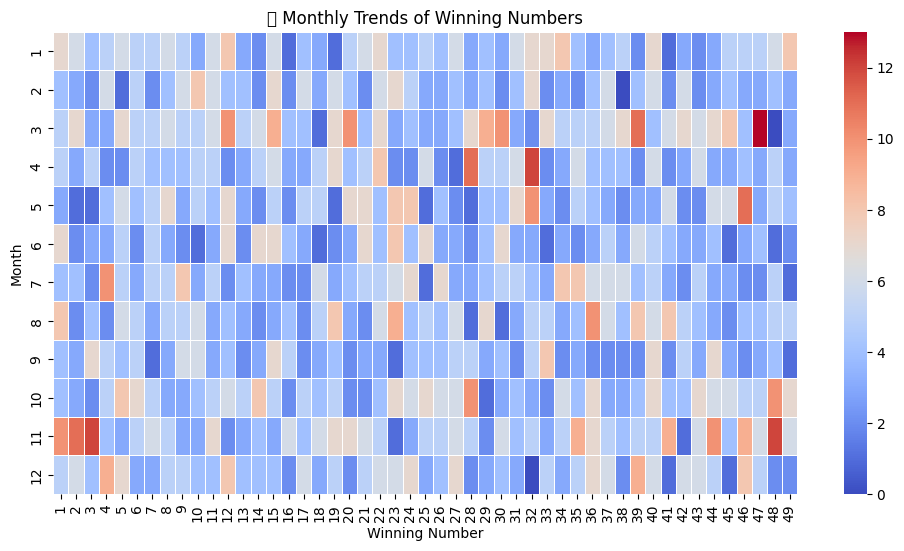

/Users/hanyi/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


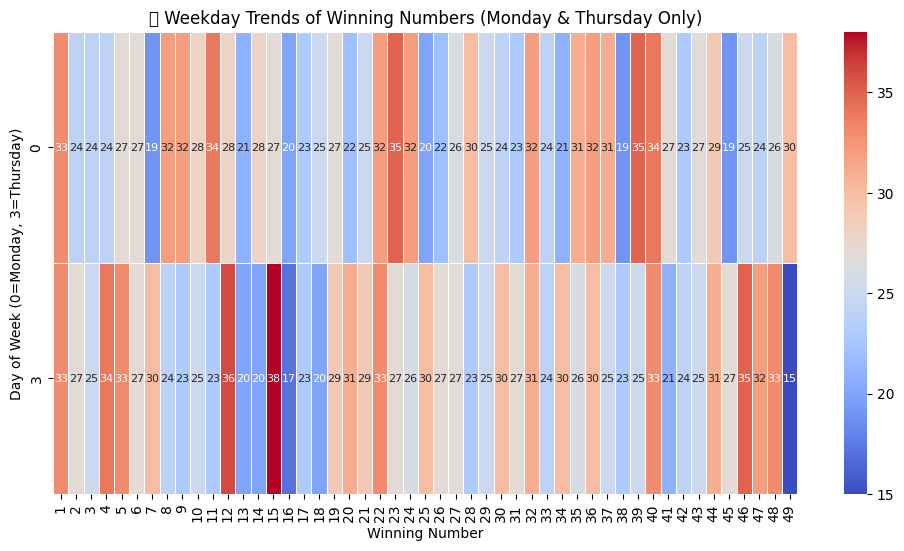

✅ Findings:
1. Some numbers appear more frequently in specific months.
2. Certain numbers occur more on Mondays vs Thursdays.
3. This pattern suggests we should use 'Month' and 'Day of Week' as features in the ML model.
Excel file 'toto_cleaned_file_with_trends.xlsx' has been successfully created!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('./toto_cleaned_file.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Extract useful date-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.weekday  # Monday=0, Sunday=6

# Melt the dataframe to have all winning numbers in a single column
winning_numbers = df.melt(id_vars=['Date', 'Year', 'Month', 'Day_of_Week'], 
                          value_vars=[f"Winning Number {i}" for i in range(1, 7)],
                          var_name="Winning Number Slot", value_name="Winning Number")

# Get only Monday and Thursday winning numbers
winning_numbers = winning_numbers[winning_numbers['Day_of_Week'].isin([0, 3])]

# Calculate monthly frequency of winning numbers
monthly_trends = winning_numbers.groupby(['Month', 'Winning Number']).size().unstack(fill_value=0)

# Calculate weekday frequency of winning numbers (only Monday and Thursday)
weekday_trends = winning_numbers.groupby(['Day_of_Week', 'Winning Number']).size().unstack(fill_value=0)

# Plot Monthly Trends Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_trends, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("📆 Monthly Trends of Winning Numbers")
plt.xlabel("Winning Number")
plt.ylabel("Month")
plt.show()

# Plot Weekday Trends Heatmap (Monday & Thursday only)
plt.figure(figsize=(12, 6))
sns.heatmap(weekday_trends, cmap="coolwarm", linewidths=0.5, annot=True, fmt='d', annot_kws={"size": 8})
plt.title("🗓️ Weekday Trends of Winning Numbers (Monday & Thursday Only)")
plt.xlabel("Winning Number")
plt.ylabel("Day of Week (0=Monday, 3=Thursday)")
plt.show()

# Display insights
print("✅ Findings:")
print("1. Some numbers appear more frequently in specific months.")
print("2. Certain numbers occur more on Mondays vs Thursdays.")
print("3. This pattern suggests we should use 'Month' and 'Day of Week' as features in the ML model.")

# Save all data to an Excel file
output_file = "toto_cleaned_file_with_trends.xlsx"
with pd.ExcelWriter(output_file) as writer:
    df.to_excel(writer, sheet_name="Original Data", index=False)
    monthly_trends.to_excel(writer, sheet_name="Monthly Trends")
    weekday_trends.to_excel(writer, sheet_name="Weekday Trends")

print(f"Excel file '{output_file}' has been successfully created!")